In [50]:
import torch
import matplotlib.pyplot as plt
import matplotlib
from IPython import display


In [51]:
def annotated_heatmaps(grid: torch.Tensor, axes, bar=False,**imkargs):
    im = axes.imshow(grid,**imkargs)
    if bar:
        im.figure.colorbar(im, ax=axes)
    for row in range(len(grid)):
        for col in range(len(grid[row])):
            axes.text(
                row, col, f"{grid[row,col]:.3}", ha="center", va="center", color="w"
            )


In [52]:
conve_layer = torch.nn.Conv2d(1,1,3,padding=(1,1),bias=False)
optimizer = torch.optim.SGD(conve_layer.parameters(),0.01,momentum=0.01)
loss_fucnction = torch.nn.MSELoss()

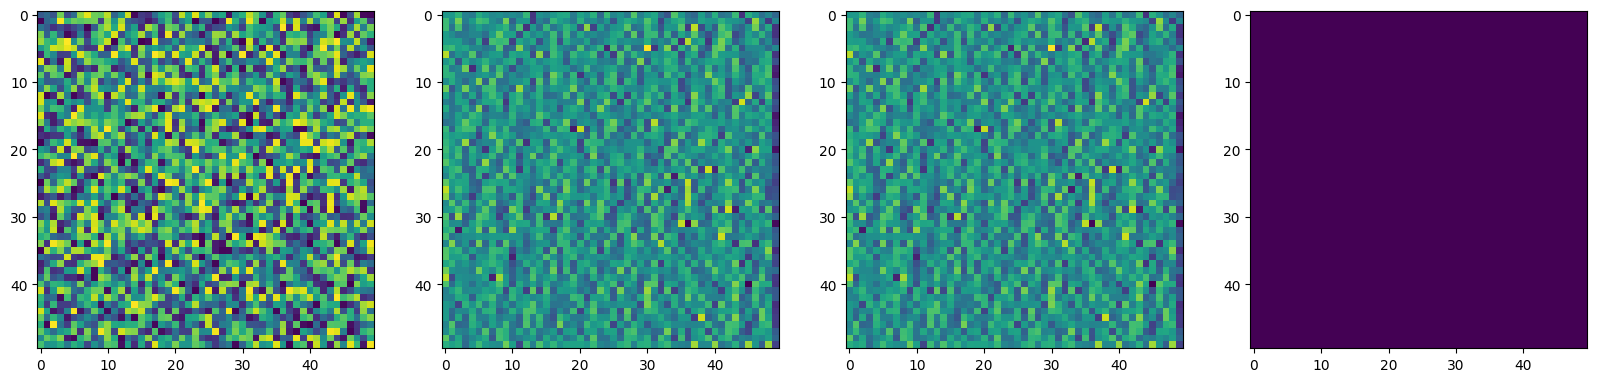

In [53]:
image = torch.rand(1,1,50,50)
target_filter = conve_layer.weight.detach()
out_f = torch.conv2d(image, target_filter,padding=(1,1))
out_layer = conve_layer(image)
fig,axis = plt.subplots(1,4,figsize=(20,5))
axis[0].imshow(image[0,0,:,:])
axis[1].imshow(out_f[0,0,:,:])
axis[2].imshow(out_layer.detach()[0,0,:,:])
axis[3].imshow((out_layer.detach()-out_f)[0,0,:,:])



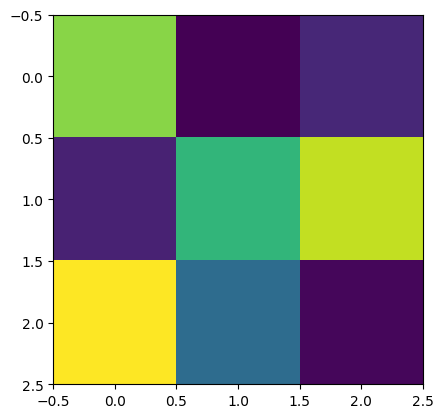

In [55]:
image = torch.rand(1,1,50,50)
target_filter = torch.rand(1,1,3,3)
target = torch.conv2d(image, target_filter,padding=(1,1))
plt.imshow(target_filter[0,0,:,:])

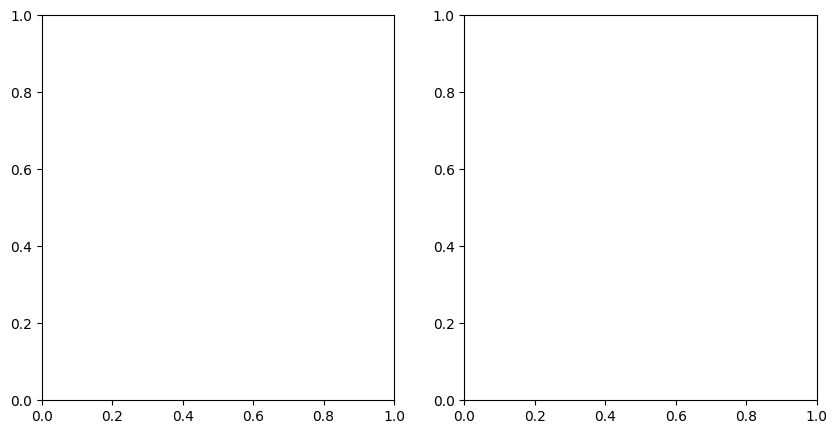

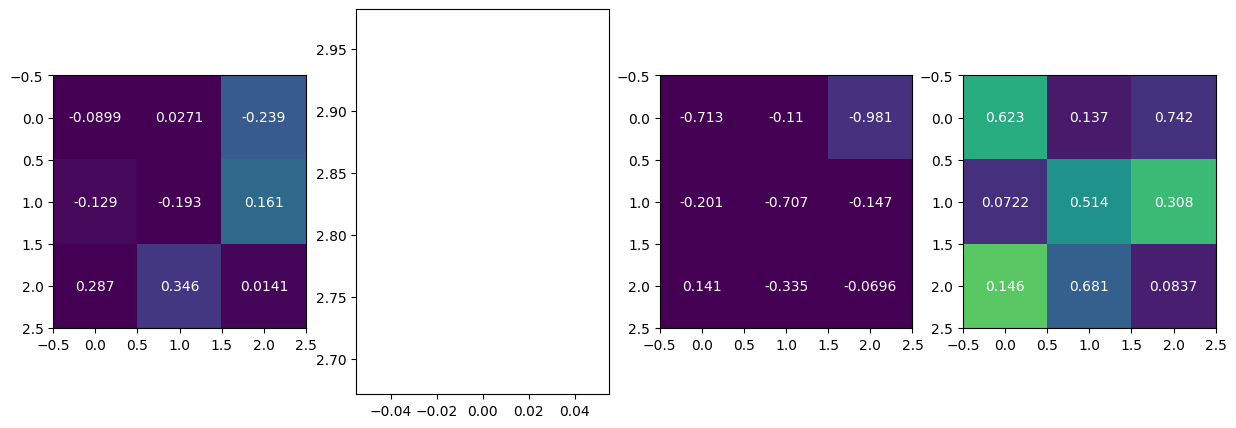

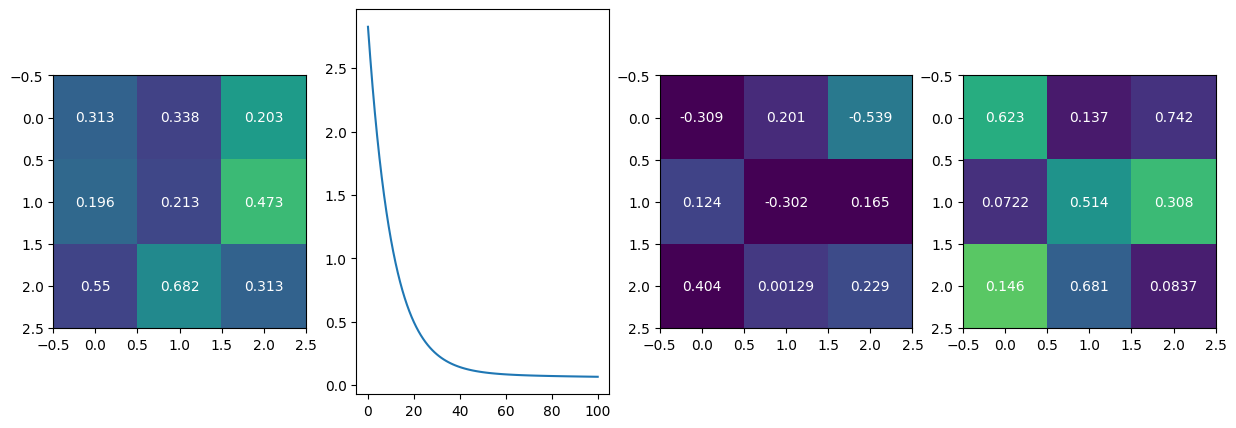

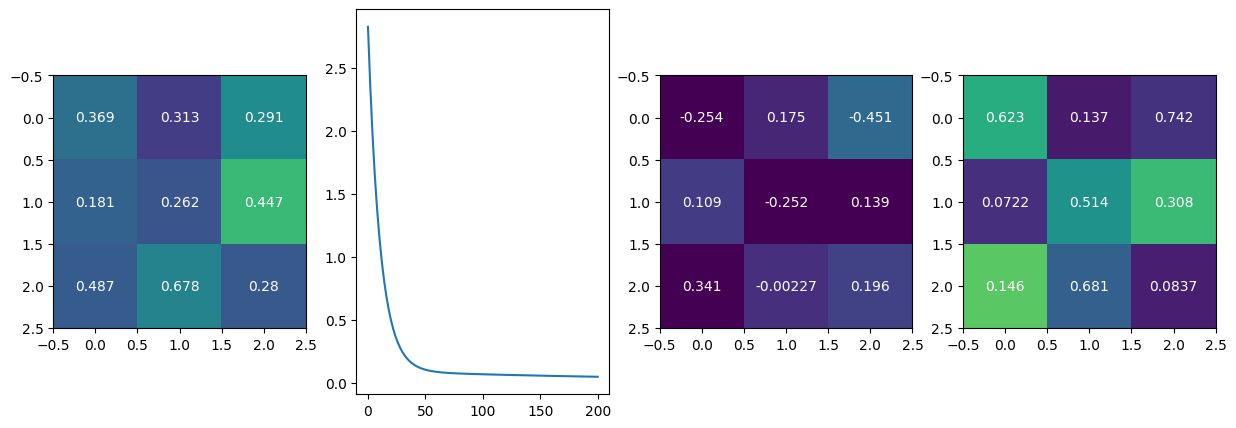

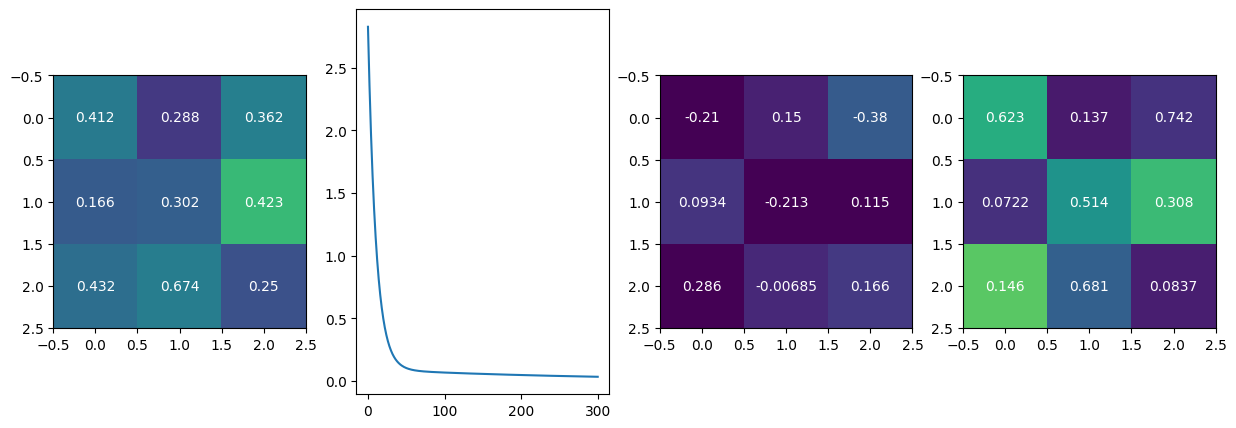

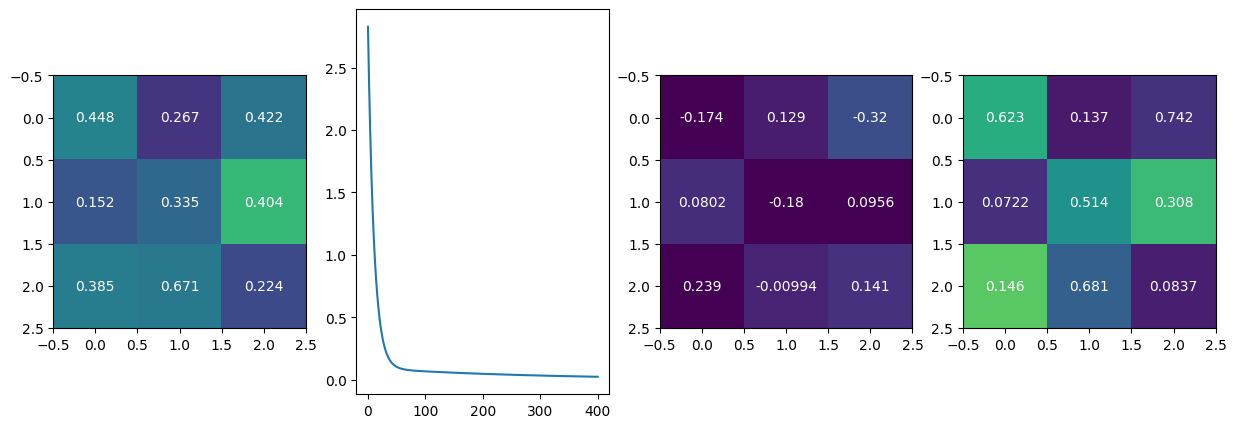

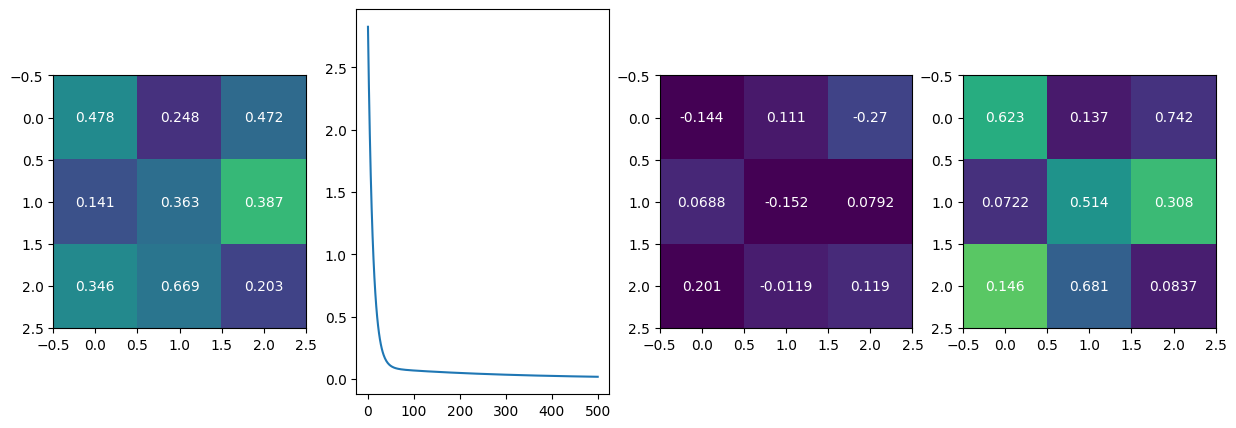

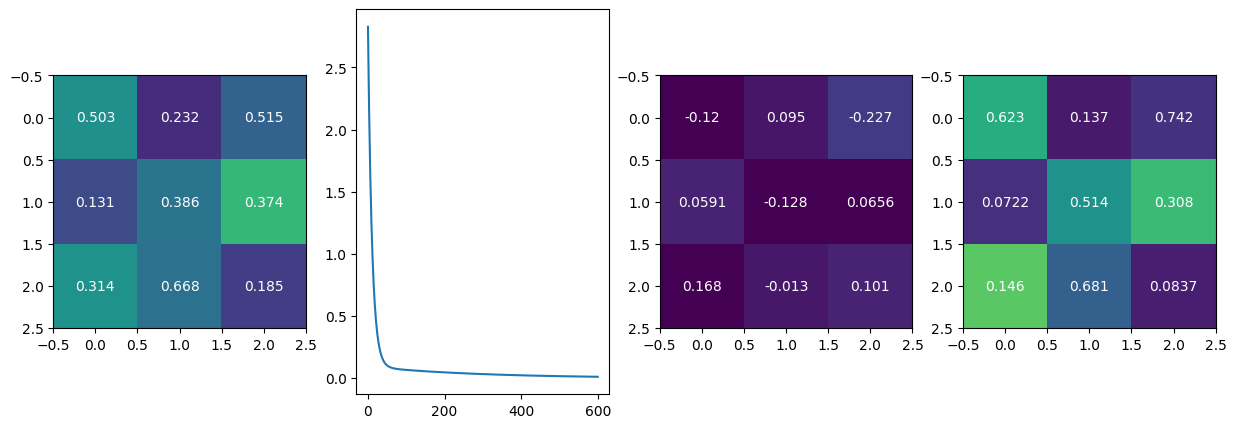

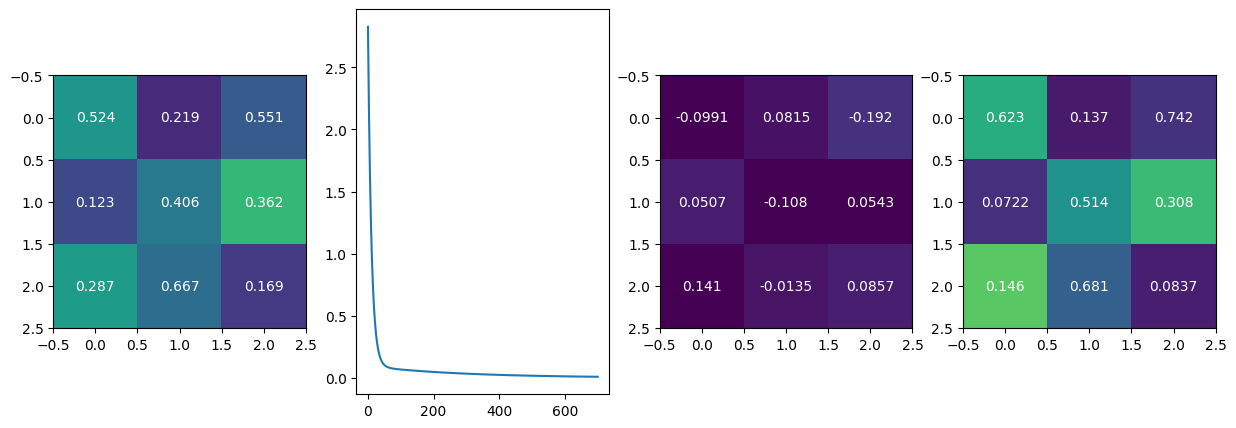

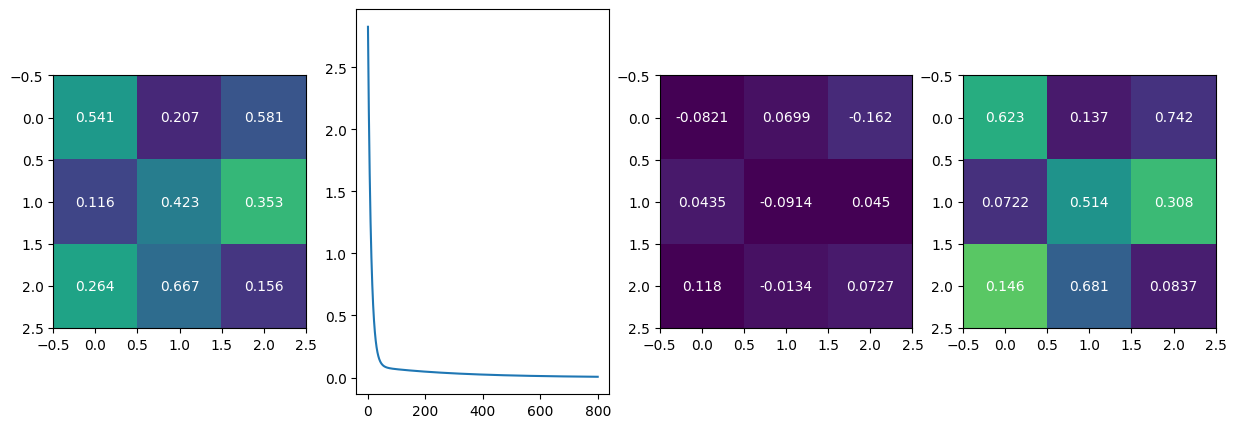

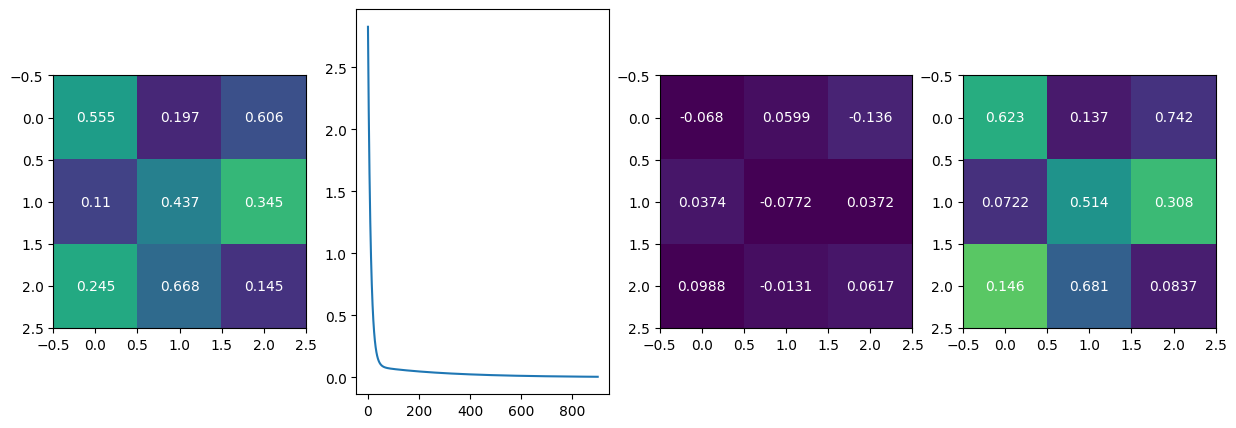

In [56]:
loss_list = []
fig, (axis_width, axis_loss) = plt.subplots(1, 2, figsize=(10, 5))
for i in range(1000):
    out_layer = conve_layer(image)
    diff = loss_fucnction(target, out_layer)
    optimizer.zero_grad()
    diff.backward()
    optimizer.step()
    loss_list.append(diff.item())
    if i % 100 == 0:
        fig, (axis_width, axis_loss, axis_diff, axis_target_filter) = plt.subplots(
            1, 4, figsize=(15, 5)
        )
        axis_loss.plot(range(len(loss_list)), loss_list)
        annotated_heatmaps(conve_layer.weight.detach()[0, 0, :, :], axis_width,vmin=0, vmax=1)
        annotated_heatmaps(
            (conve_layer.weight.detach() - target_filter)[0, 0, :, :], axis_diff,vmin=0, vmax=1
        )
        annotated_heatmaps(target_filter[0, 0, :, :], axis_target_filter,vmin=0, vmax=1)
